# Outline
Text goes here

In [70]:
# Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from citipy import citipy
import random
import requests
import json
import io
from sklearn.linear_model import LinearRegression

# Get API key from api_keys.py
import api_keys
api_ow = api_keys.api_ow

In [2]:
# Sample API call for OpenWeather geolocation (UNUSED):
# http://api.openweathermap.org/geo/1.0/direct?q=CITYNAME,STATECODE,COUNTRYCODE&limit=LIMIT&appid=APIKEY

# Sample API call for OpenWeather weather data:
# units = "imperal"
#api_string = "https://api.openweathermap.org/data/2.5/weather?lat=" + LATITUDE + "&lon=" + LONGITUDE + "&appid=" + api_ow + "&units=" + units
# MAKE SURE YOU DON'T PRINT api_string BECAUSE THAT WILL EXPOSE YOUR API KEY.

In [126]:
# Functions

# Generates a random number between -180 and 180 degrees (0 is Greenwich, England).
def genLatitude():
    randomLat = random.uniform(-180, 180)
    return round(randomLat, 5)

# Generates a random number between -90 and 90 degrees (0 is equator)
def genLongitude():
    randomLong = random.uniform(-90, 90)
    return round(randomLong, 5)

# Send an OpenWeather API request with a set of latitude and longitude coordinates and the type of units (valid values are "standard", "metric", "imperial").
# Response will be in JSON. Extract temperature, humidity, cloudiness, wind speed.
# Return a JSON data structure.
def getWeatherData(lat, long, units):
    api_string = "https://api.openweathermap.org/data/2.5/weather?lat=" + str(lat) + "&lon=" + str(long) + "&appid=" + api_ow + "&units=" + units
    print("Sending API request for weather data...")
    result = requests.get(api_string)
    if result.content.__len__() > 0:
        print("Got API response: " + result.content.decode("utf-8"))
        json_result = result.content.decode("utf-8")
        json_result = json.loads(json_result)
        if json_result["cod"] != "200":
            print("API call successful. Returning JSON object.")
            return json_result
        else:
            print("API call error. Returning 0.")
            result_error = 0
            return result_error
    else:
        print("API response was empty. Returning 0.")
        result_error = 0
        return result_error

# THIS FUNCTION IS UNUSED; IT IS INCLUDED FOR CONTEXT
# Send an OpenWeather API request with a city name, a country code, and a limit of the number of responses. In most cases the limit should be 1.
# Return the details of the city in a single-row dataframe if the API call was successful. If not, returns 0.
# def getCityCoordinates(city, country, limit):
#     api_string = "http://api.openweathermap.org/geo/1.0/direct?q=" + city + "," + country + "&limit=" + str(limit) + "&appid=" + api_ow + "&lang=en"
#     print("Sending API request to geolocate city...")
#     result = requests.get(api_string)
#     if result.content.__len__() > 0:
#         print("Got API response: " + result.content.decode("utf-8"))
#         df_result = pd.read_json(result.content.decode("utf-8"))
#         result_columns = ["name", "lat", "lon", "country"]
#         df_result = df_result.loc[:, result_columns]
#         return df_result
#     else:
#         print("API response was empty. Returning 0.")
#         result_error = 0
#         return result_error

In [49]:
# Dataframe to hold city data.
df_cities = pd.DataFrame(columns=["ID", "City", "Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Windspeed (MPH)"])

In [96]:
# Generate 500 random sets of long/lat coordinates.
# Get the nearest city to each coordinates. If it's not in the list, add its weather data.
count = df_cities.__len__() # This is to make sure new cities are only generated to fill a DF with under 500 elements
while count < 500:
    lat = genLatitude()
    long = genLongitude()
    nearest = citipy.nearest_city(lat, long)
    city = [nearest.city_name, nearest.country_code, nearest.lat, nearest.lng]
    json_response = getWeatherData(city[2], city[3], "imperial")
    if json_response == 0:
        print("Error in API. Try again with different coordinates.")
    else:
        if json_response["id"] not in df_cities["ID"].values:
            print("Adding new row " + str(count) + " to cities dataframe.")
            row_to_add = {
                "ID": json_response["id"],
                "City": json_response["name"],
                "Latitude": json_response["coord"]["lat"],
                "Longitude": json_response["coord"]["lon"],
                "Temperature (F)": json_response["main"]["temp"],
                "Humidity (%)": json_response["main"]["humidity"],
                "Cloudiness (%)": json_response["clouds"]["all"],
                "Windspeed (MPH)": json_response["wind"]["speed"]
            }
            df_city = pd.DataFrame.from_records([row_to_add])
            df_cities = pd.concat([df_cities, df_city], ignore_index=True)
            count += 1
        else:
            print("Duplicate city. Try again.")

Sending API request for weather data...
Got API response: {"coord":{"lon":70.2194,"lat":-49.3492},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":35.22,"feels_like":22.62,"temp_min":35.22,"temp_max":35.22,"pressure":1014,"humidity":68,"sea_level":1014,"grnd_level":1014},"visibility":10000,"wind":{"speed":30.47,"deg":216,"gust":34.34},"clouds":{"all":56},"dt":1718477609,"sys":{"country":"TF","sunrise":1718421231,"sunset":1718450731},"timezone":18000,"id":1546102,"name":"Port-aux-Français","cod":200}
API call successful. Returning JSON object.
Duplicate city. Try again.
Sending API request for weather data...
Got API response: {"coord":{"lon":-52.8699,"lat":68.7098},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":39.34,"feels_like":34.66,"temp_min":39.34,"temp_max":39.34,"pressure":1015,"humidity":83,"sea_level":1015,"grnd_level":1015},"visibility":10000,"

In [123]:
# Copy the cities_df so it can be used locally while another one is created.
df_cities_copy = df_cities
df_cities_copy.to_csv("./output/500_cities.csv")

## Visualization
Generate scatter plots for latitude vs the following:
- Temp (F)
- Humidity (%)
- Cloudiness (%)
- Wind speed (mph)

Each plot should have a couple sentences explaining what it's showing.


<Axes: xlabel='Latitude', ylabel='Temperature (F)'>

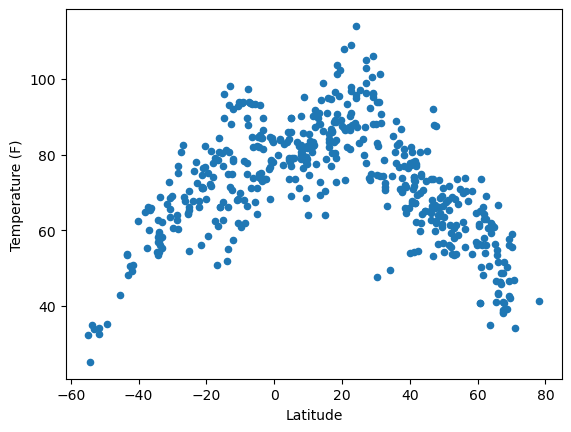

In [100]:
# Scatter plot for X (latitude) and Y (temperature) axes
df_cities_copy.plot.scatter(x="Latitude", y="Temperature (F)")

#### Global Latitude vs Temperature
Temperatures tend to be higher near the equator, and the outliers from each band of latitude are somewhat restrained. Even the highest temperatures from a location 40+ degrees away from the equator are only average or less for equatorial temperature.

<Axes: xlabel='Latitude', ylabel='Humidity (%)'>

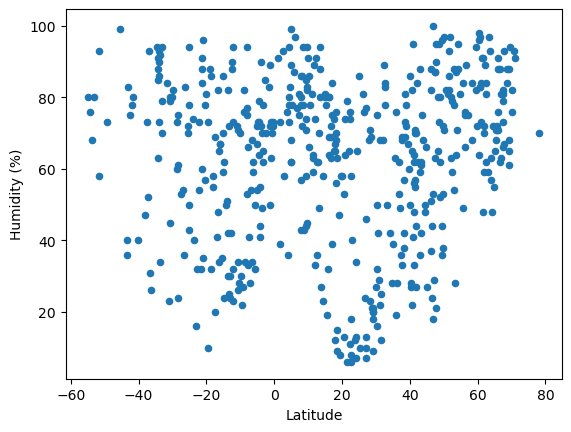

In [101]:
# Scatter plot for X (latitude) and Y (humidity) axes
df_cities_copy.plot.scatter(x="Latitude", y="Humidity (%)")

#### Global Latitude vs Humidity
Many polar/non-equatorial locations are quite humid (60 or above), but this is also true of many equatorial locations as well. The only significant trends visible are:
- There is a band directly near the equator which has very low humidity.
- There are two bands below and above the equator which have a wide range of humidity.

The latter is likely due to the spread of inland/coastal cities near the equator.

<Axes: xlabel='Latitude', ylabel='Cloudiness (%)'>

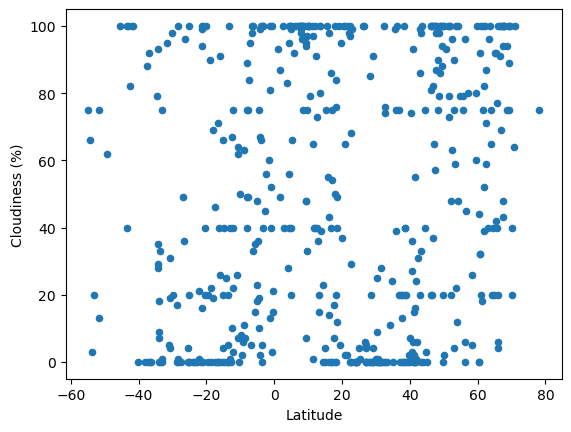

In [102]:
# Scatter plot for X (latitude) and Y (cloudiness) axes
df_cities_copy.plot.scatter(x="Latitude", y="Cloudiness (%)")

#### Global Latitude vs Cloudiness
There is really no significant pattern here, which makes sense. Clouds are evenly distributed everywhere around the planet, and while there are some areas which have notably more and more consistent cloud cover, that does not prevent other locations from being overcast.

<Axes: xlabel='Latitude', ylabel='Windspeed (MPH)'>

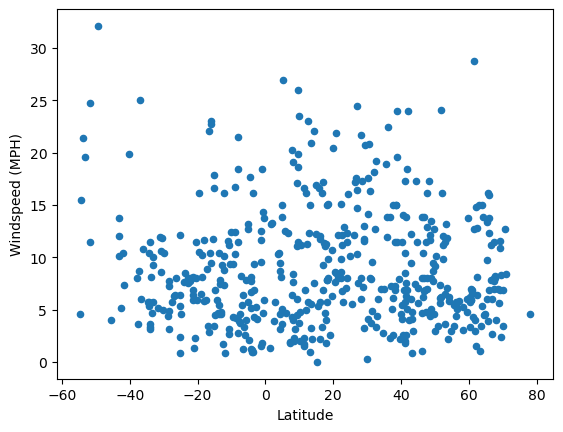

In [103]:
# Scatter plot for X (latitude) and Y (windspeed) axes
df_cities_copy.plot.scatter(x="Latitude", y="Windspeed (MPH)")

#### Global Latitude vs Windspeed
As with the cloudiness scatter plot, there is no signicant pattern. Windspeed is determined by geography (mountains, hills, proximity to bodies of water) more than any other factor. There are prevailing winds which have some influence, but their speed at any particular location has nothing to do with latitude.

Linear regressions on each relationship. Separate the plots into northern and southern hemispheres (0 or greater lat, below 0 lat).
- NH Temp (F) vs latitude
- SH Temp (F) vs latitude
- NH Humidity (%) vs latitude
- SH Humidity (%) vs latitude
- NH Cloudiness (%) vs latitude
- SH Cloudiness (%) vs latitude
- NH Wind speed (mph) vs latitude
- SH Wind speed (mph) vs latitude

Each plot should have a couple sentences explaining what the linear regression actually models

In [104]:
# Split the local copy into northern and southern cities.
df_nh = df_cities_copy[df_cities_copy["Latitude"] >= 0]
df_sh = df_cities_copy[df_cities_copy["Latitude"] < 0]
print("Northern hemisphere cities: " + str(df_nh.__len__()))
print("Southern hemisphere cities: " + str(df_sh.__len__()))

Northern hemisphere cities: 333
Southern hemisphere cities: 167


The linear equation is: y = -0.58x + 94.05


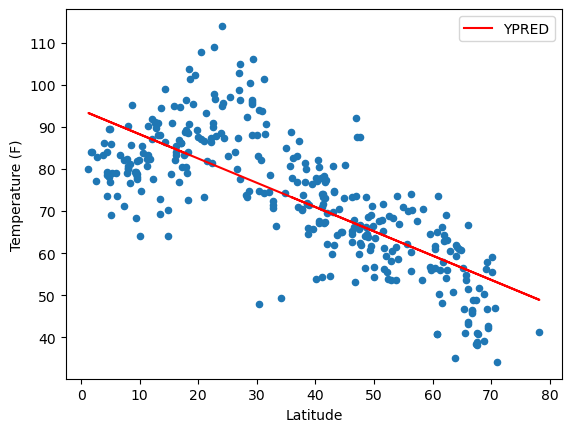

In [115]:
# NH latitude vs temp
x = df_nh["Latitude"].values.reshape(-1, 1)
y = df_nh["Temperature (F)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_nh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_nh.plot.scatter(x="Latitude", y="Temperature (F)")
df_nh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/NH_linear_latitude_temperature")

#### Northern Hemisphere Linear Regression - Latitude vs Temperature
Temperature decreases as you move farther away from the equator, which is sensible and easily proven by the scatter plot and linear regression. There is a strong, clear relationship between latitude and temperature.

The linear equation is: y = 0.78x + 85.66


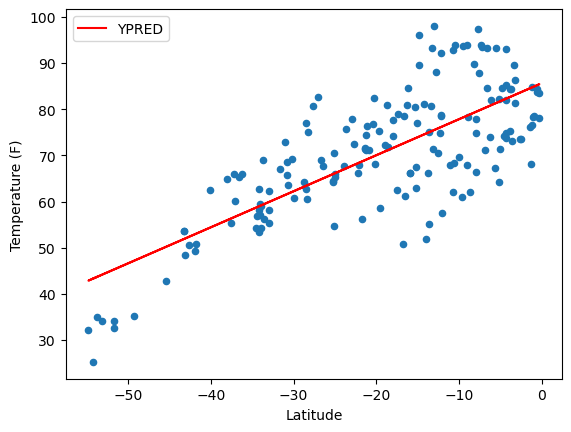

In [116]:
# SH latitude vs temp
x = df_sh["Latitude"].values.reshape(-1, 1)
y = df_sh["Temperature (F)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_sh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_sh.plot.scatter(x="Latitude", y="Temperature (F)")
df_sh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/SH_linear_latitude_temperature")

#### Southern Hemisphere Linear Regression - Latitude vs Temperature
Temperature decreases as you move farther away from the equator, which is sensible and easily proven by the scatter plot and linear regression. There is a strong, clear relationship between latitude and temperature.

The linear equation is: y = 0.21x + 55.26


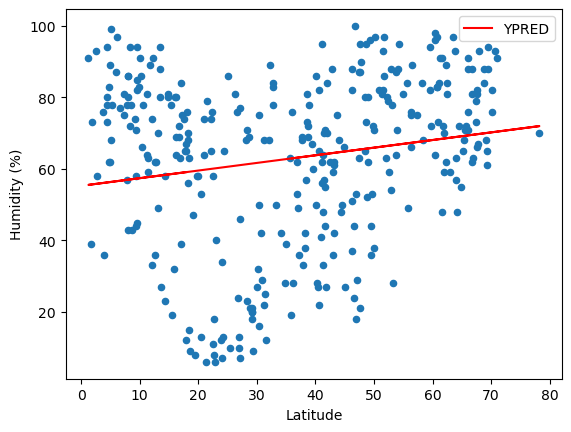

In [117]:
# NH latitude vs humidity
x = df_nh["Latitude"].values.reshape(-1, 1)
y = df_nh["Humidity (%)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_nh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_nh.plot.scatter(x="Latitude", y="Humidity (%)")
df_nh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/NH_linear_latitude_humidity")

#### Northern Hemisphere Linear Regression - Latitude vs Humidity
Humidity generally increases you move farther away from the equator, although there is still a very wide range of values. There is a weak relationship between latitude and humidity. It might be more accurate to say that your odds of low humidity simply get worse.

The linear equation is: y = -0.26x + 56.87


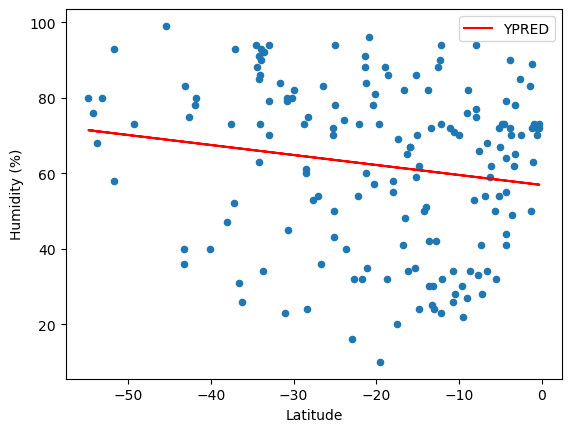

In [118]:
# SH latitude vs humidity
x = df_sh["Latitude"].values.reshape(-1, 1)
y = df_sh["Humidity (%)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_sh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_sh.plot.scatter(x="Latitude", y="Humidity (%)")
df_sh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/SH_linear_latitude_humidity")

#### Southern Hemisphere Linear Regression - Latitude vs Humidity
Humidity generally increases you move farther away from the equator, although there is still a very wide range of values. There is a weak relationship between latitude and humidity.

The linear equation is: y = 0.07x + 50.45


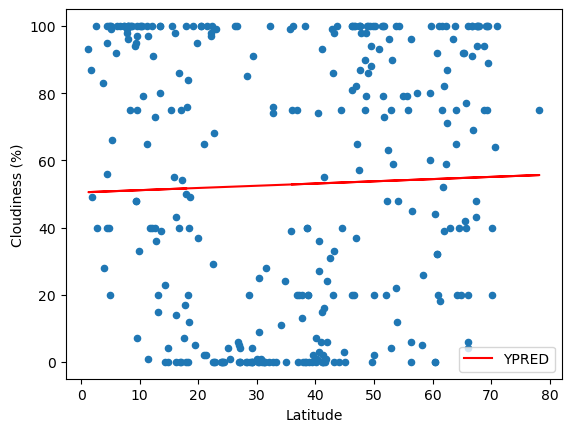

In [119]:
# NH latitude vs cloudiness
x = df_nh["Latitude"].values.reshape(-1, 1)
y = df_nh["Cloudiness (%)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_nh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_nh.plot.scatter(x="Latitude", y="Cloudiness (%)")
df_nh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/NH_linear_latitude_cloudiness")

#### Northern Hemisphere Linear Regression - Latitude vs Cloudiness
Latitude has no bearing on cloudiness in either hemisphere. There is no relationship between latitude and cloudiness.

The linear equation is: y = 0.03x + 39.44


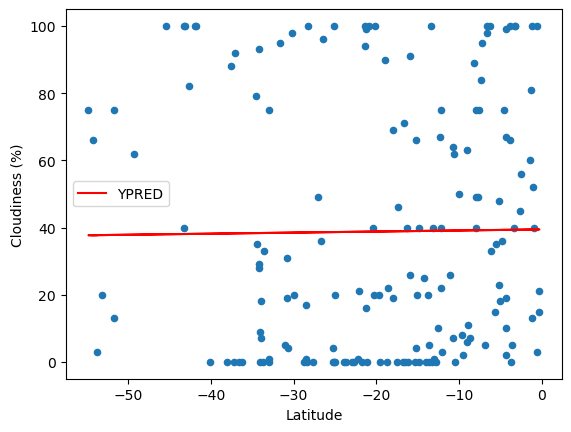

In [120]:
# SH latitude vs cloudiness
x = df_sh["Latitude"].values.reshape(-1, 1)
y = df_sh["Cloudiness (%)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_sh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_sh.plot.scatter(x="Latitude", y="Cloudiness (%)")
df_sh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/SH_linear_latitude_cloudiness")

#### Southern Hemisphere Linear Regression - Latitude vs Cloudiness
Latitude has no bearing on cloudiness in either hemisphere. There is no relationship between latitude and cloudiness.

The linear equation is: y = -0.03x + 10.41


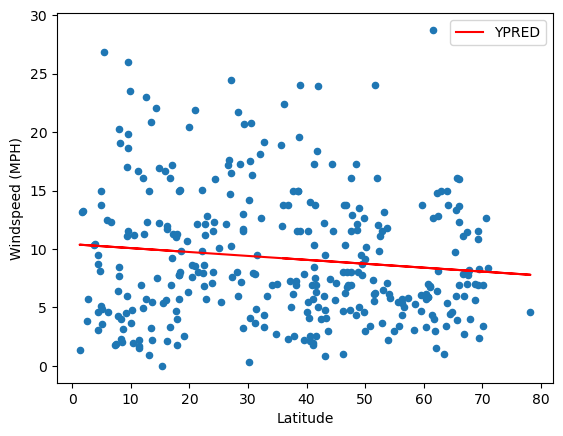

In [121]:
# NH latitude vs windspeed
x = df_nh["Latitude"].values.reshape(-1, 1)
y = df_nh["Windspeed (MPH)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_nh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_nh.plot.scatter(x="Latitude", y="Windspeed (MPH)")
df_nh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/NH_linear_latitude_windspeed")

#### Northern Hemisphere Linear Regression - Latitude vs Windspeed
Latitude has very little bearing on windspeed, so there is not much of a pattern to be found with a linear regression.

The linear equation is: y = -0.09x + 6.79


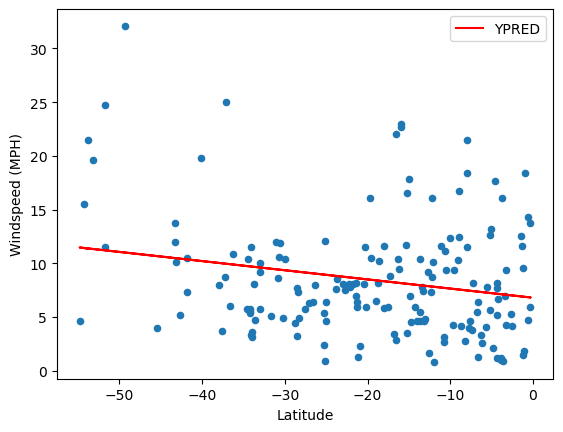

In [122]:
# SH latitude vs windspeed
x = df_sh["Latitude"].values.reshape(-1, 1)
y = df_sh["Windspeed (MPH)"].values.reshape(-1, 1)


model = LinearRegression().fit(x, y)
m = model.coef_[0]
b = model.intercept_
df_sh["YPRED"] = model.predict(x)
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

ax = df_sh.plot.scatter(x="Latitude", y="Windspeed (MPH)")
df_sh.plot(x="Latitude", y="YPRED", color="red", ax=ax)

fig = ax.get_figure()
fig.savefig("./output/SH_linear_latitude_windspeed")

#### Southern Hemisphere Linear Regression - Latitude vs Windspeed
Latitude has very little bearing on windspeed, so there is not much of a pattern to be found with a linear regression.